# # Netflix Original Films & IMDB Scores


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [3]:
df = pd.read_csv(r"C:\Users\shah7\Data Projects\Netflix EDA\NetflixOriginals.csv", encoding="ISO-8859-1")
df


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [7]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

df['year'] = df['Premiere'].dt.year
df['month'] = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


In [29]:
#in which language long running films 
df_temp = df.groupby(['Runtime','Title','Language']).mean(numeric_only=True).sort_values(by='Runtime',ascending=False).reset_index().iloc[:,:3]

In [30]:
fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()
     


In [31]:
df_doc = df[ ((df["year"]== 2019) | ((df["year"]== 2020) & ((df["month"] ==("January"))| (df["month"] ==("February"))| (df["month"] ==("March"))| (df["month"] ==("April")) | (df["month"] ==("May")) |
                                                            (df["month"] ==("June")))) ) & (df["Genre"]== "Documentary")  ]


In [32]:
fig = px.bar(df_doc, x='year', y='IMDB Score',color="month")
fig.update_traces(marker_color='light blue')
fig.show()
     


In [33]:
fig = px.scatter(df_doc, x='year', y='IMDB Score',color="month")
fig.update_traces(marker_size=12)
fig.show()
     


In [40]:
# df is our DataFrame
#Highest imdb rating among movies
top_imdb_english = df[df['Language'] == "English "]
top_imdb_english = top_imdb_english.groupby(['Language', 'Genre', 'Title']).mean(numeric_only=True).sort_values(by=["IMDB Score"], ascending=False)[:10]
top_imdb_english

,,,Runtime,IMDB Score,year
Language,Genre,Title,,,


In [41]:
print(top_imdb_english)

Empty DataFrame
Columns: [Runtime, IMDB Score, year]
Index: []


In [42]:
df_hindi = df[df["Language"] == "Hindi"]
df_hindi.Runtime.value_counts()
df_hindi.Runtime.mean()

115.78787878787878

In [43]:
df_english = df[df["Language"] == "English"]
df_english.Runtime.value_counts()
df_english.Runtime.mean()

91.81795511221945

In [47]:
df['Genre'].value_counts()
df['Genre'].value_counts().sum()
genre =df['Genre'].value_counts()

In [46]:
genre = df['Genre'].value_counts()
print(genre)

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64


In [48]:
fig = px.bar(genre, x= genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
     

In [49]:
#-Find the 3 most used languages in the movies in the data set.
# printing unique values of Language
df.Language.unique()
df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [51]:
df_top_lang = df.Language.value_counts().nlargest(3)
print(df_top_lang)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


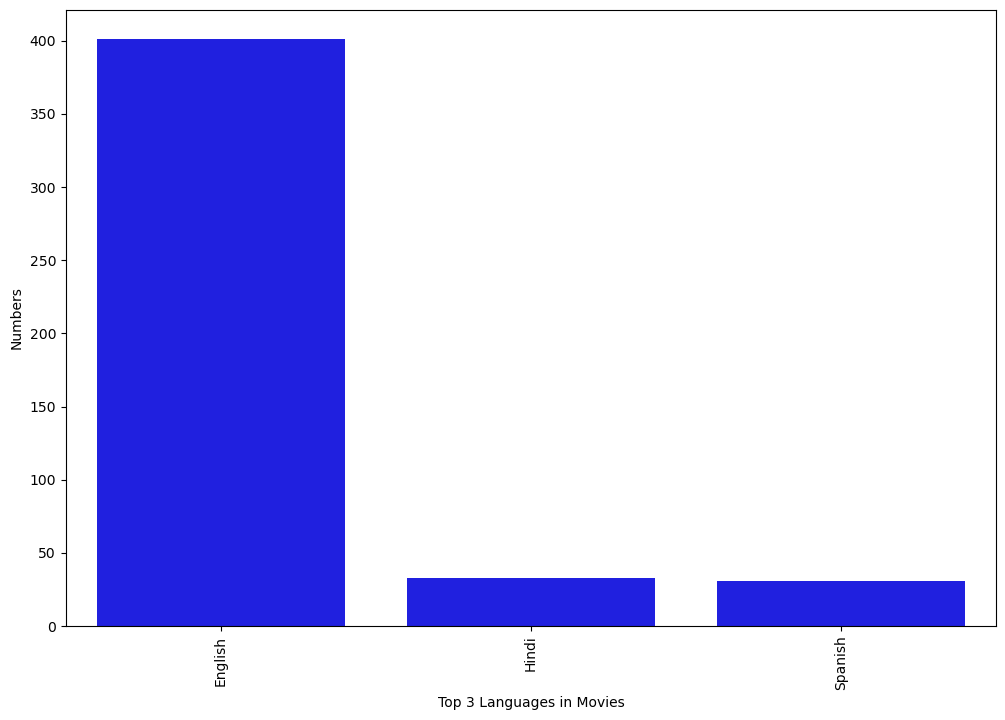

In [53]:
# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_top_lang.index,y=df_top_lang.values,data=df,color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Numbers')
plt.show()
     

In [54]:
df[['IMDB Score','Runtime']].corr()


,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [57]:
fig = px.histogram(df, x='IMDB Score', y='Runtime')
fig.show()
     

In [58]:
fig = px.bar(df, x='IMDB Score', y='Runtime')
fig.show()
     

In [59]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()
     

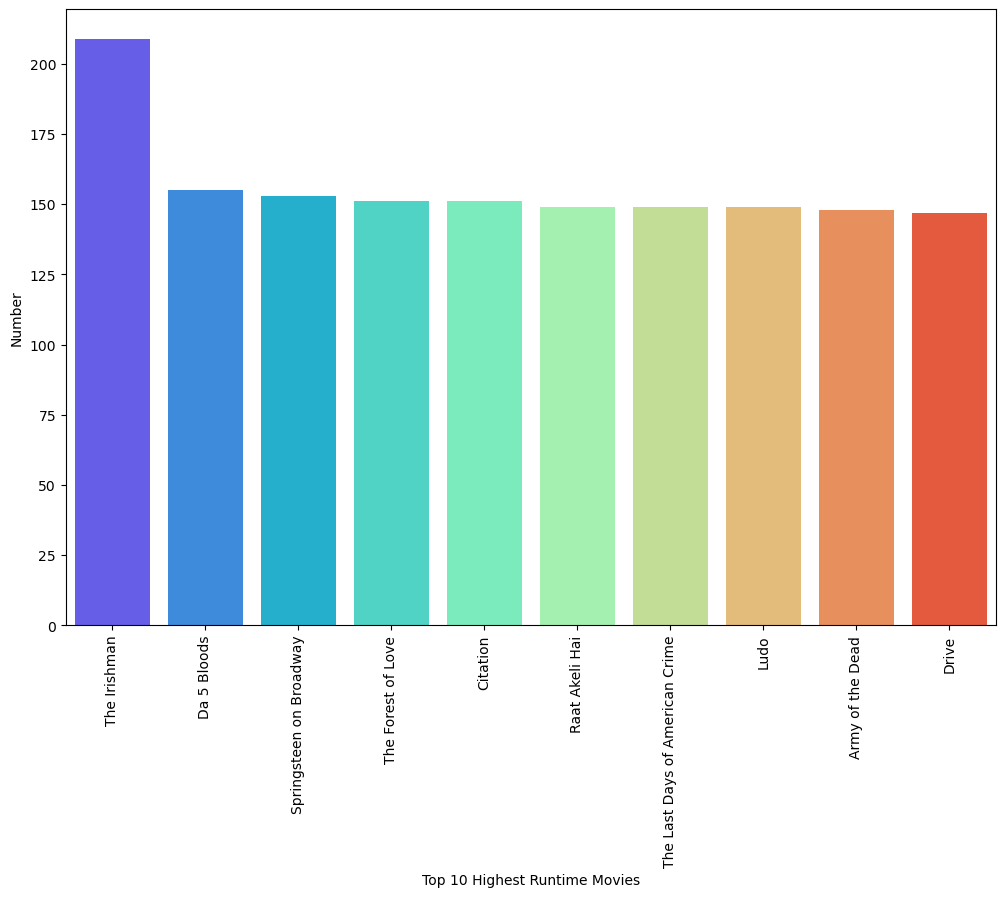

In [60]:
df_temp=df.groupby(['Title']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["Title"],y=df_temp["Runtime"],data=df,palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

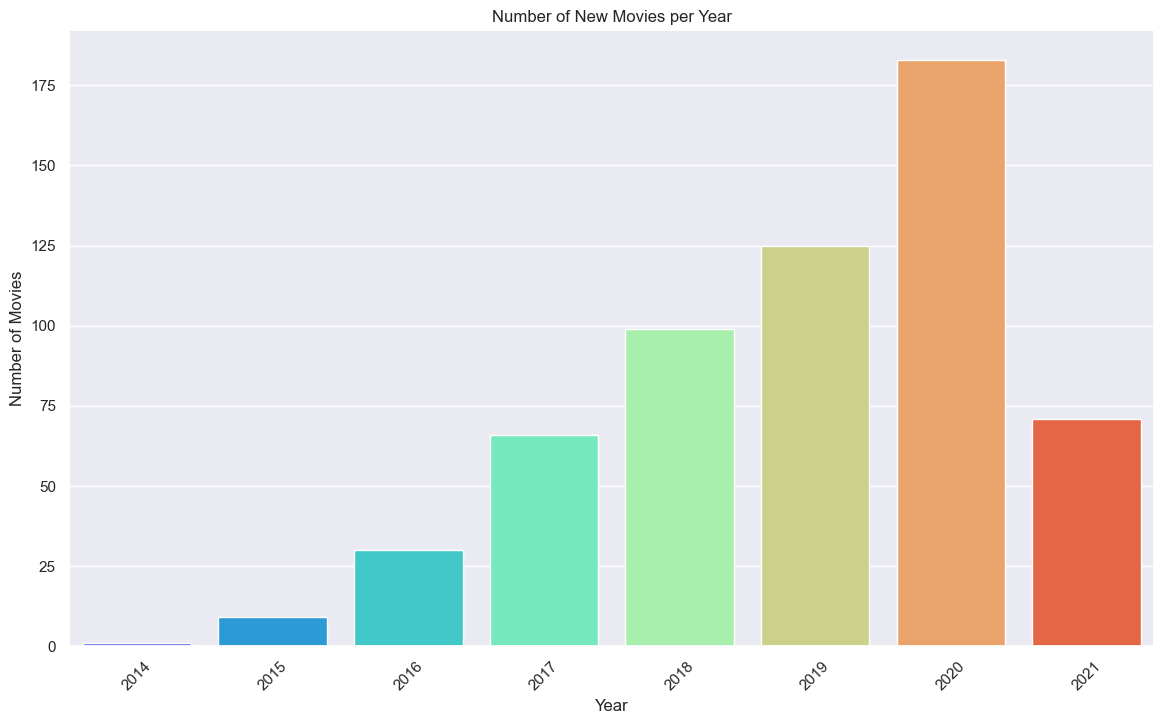

In [64]:
sns.set(rc={'figure.figsize':(14, 8)})


ax = sns.countplot(x='year', data=df, palette='rainbow')
ax.set_title('Number of New Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability

plt.show()

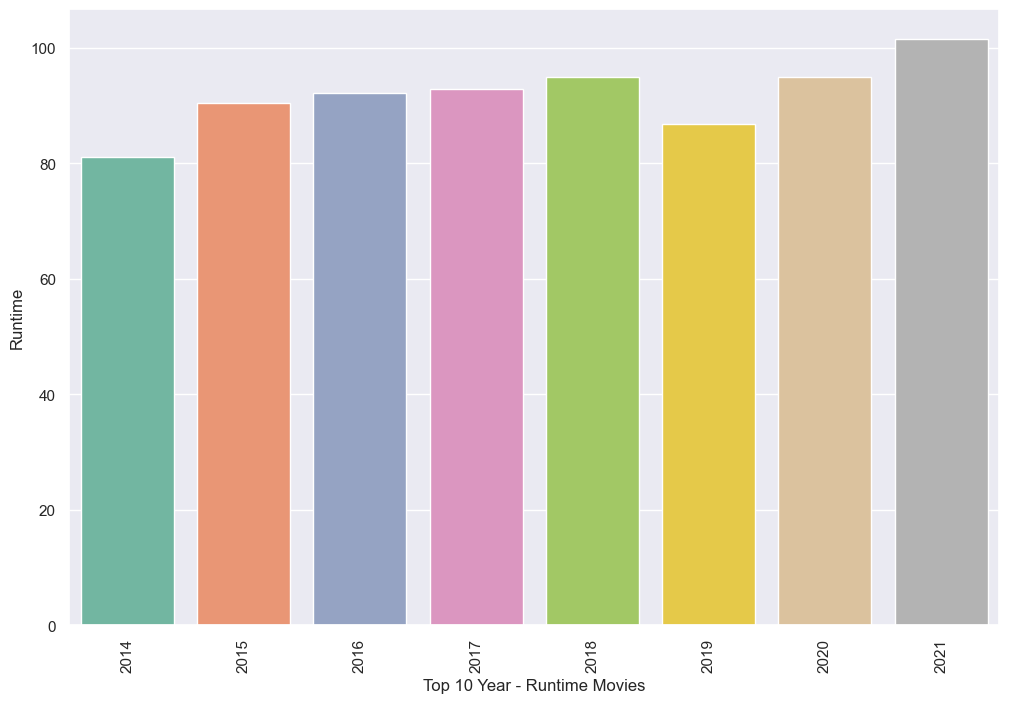

In [66]:
df_temp=df.groupby(['year']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["year"],y=df_temp["Runtime"],data=df,palette='Set2')
plt.xlabel('Top 10 Year - Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime')
plt.show()

In [67]:
df_run= df[df["year"] ==2022]
df_run.Runtime.mean()

nan

In [68]:
df_run= df[df["year"] ==2021]
df_run.Runtime.mean()

101.6056338028169

In [70]:
genre_lang =[]
for i in df.Language.unique():
    df_lang =df[df["Language"]==i]
    df_lang_genre =df_lang.Genre.value_counts().nlargest(1)
    #print(f'Language: {i}\n', df_lang_genre)
    genre_lang.append((i,df_lang_genre))


df_lang = pd.DataFrame(genre_lang, columns = ['Language', 'Genre'])
df_lang.sort_values(by=['Language'],ignore_index=True)

,Language,Genre
0,Bengali,"Documentary 1 Name: Genre, dtype: int64"
1,Dutch,"Romantic comedy 1 Name: Genre, dtype: int64"
2,English,"Documentary 120 Name: Genre, dtype: int64"
3,English/Akan,"War drama 1 Name: Genre, dtype: int64"
4,English/Arabic,"Documentary 1 Name: Genre, dtype: int64"
5,English/Hindi,"Documentary 2 Name: Genre, dtype: int64"
6,English/Japanese,"Documentary 1 Name: Genre, dtype: int64"
7,English/Korean,"Action-adventure 1 Name: Genre, dtype: int64"
8,English/Mandarin,"Documentary 2 Name: Genre, dtype: int64"
9,English/Russian,"Documentary 1 Name: Genre, dtype: int64"


In [74]:
fig = px.scatter(df, x='Runtime', y='Title', category_orders={"Title": df["Title"]})
fig.show()